In [25]:
##Loading Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
data=pd.read_csv("tourism.csv")
df=pd.DataFrame(data)
df=df.drop(columns=(['Tourist_ID',]))
n1=np.array(df['Average_Spending_Accommodation_USD'])
n2=np.array(df['Average_Spending_Transport_USD'])
n3=np.array(df['Average_Spending_Food_USD'])
df["Average_Spend"]=np.add(n1,n2,n3)
df
n4=np.array(df['Average_Cost_Per_Day_AED'])
df['Average_Cost_Per_Day_USD']=np.divide(n4,3)
n5=np.divide(n4,3)
n6=np.array(df['Stay_Duration_Days'])
df['Total_Cost']=np.multiply(n5,n6)
df

,Country,Age,Gender,Travel_Purpose,Preferred_Destination,Stay_Duration_Days,Spending_USD,Accommodation_Type,Travel_Frequency_per_Year,Average_Spending_Accommodation_USD,Average_Spending_Transport_USD,Average_Spending_Food_USD,Average_Cost_Per_Day_AED,With_Family,Average_Spend,Average_Cost_Per_Day_USD,Total_Cost
0,France,33,Male,Medical,Beach,8,3024,Hotel,3,293,103,35,5041.995085,Without Family,396,1680.665028,13445.320227
1,Canada,58,Female,Business,Beach,27,2469,Hostel,6,258,79,141,1559.226171,Without Family,337,519.742057,14033.035539
2,Canada,35,Other,Education,City,16,684,Resort,1,328,266,176,2510.978323,With Family,594,836.992774,13391.884389
3,UK,39,Other,Leisure,Adventure Park,3,880,Hotel,8,479,228,110,2362.073069,With Family,707,787.357690,2362.073069
4,France,49,Male,Leisure,Beach,10,654,Airbnb,5,331,121,194,1393.362935,Without Family,452,464.454312,4644.543117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,India,42,Female,Medical,Mountain,26,4709,Resort,5,150,141,193,3409.059496,Without Family,291,1136.353165,29545.182299
996,China,31,Male,Business,Beach,17,2435,Airbnb,8,483,113,111,1784.080994,With Family,596,594.693665,10109.792299
997,USA,68,Other,Medical,Mountain,8,3788,Hotel,8,180,196,192,2913.901563,Without Family,376,971.300521,7770.404168
998,Germany,39,Male,Business,City,5,951,Resort,9,393,100,177,3659.401598,With Family,493,1219.800533,6099.002663


#handling missing values

In [41]:
missing_val=df.isnull().sum()
missing_val

Country                               0
Age                                   0
Gender                                0
Travel_Purpose                        0
Preferred_Destination                 0
Stay_Duration_Days                    0
Spending_USD                          0
Accommodation_Type                    0
Travel_Frequency_per_Year             0
Average_Spending_Accommodation_USD    0
Average_Spending_Transport_USD        0
Average_Spending_Food_USD             0
Average_Cost_Per_Day_AED              0
With_Family                           0
Average_Spend                         0
Average_Cost_Per_Day_USD              0
Total_Cost                            0
dtype: int64

In [62]:
category=df.select_dtypes(include=["object","category"]).columns

In [63]:
print(category)

Index([], dtype='object')


In [64]:
le=LabelEncoder()
cols=['Country', 'Gender', 'Travel_Purpose',
       'Preferred_Destination', 'Accommodation_Type', 'With_Family']
for col in cols:
    df[col]=le.fit_transform(df[col])

In [65]:
df

,Country,Age,Gender,Travel_Purpose,Preferred_Destination,Stay_Duration_Days,Spending_USD,Accommodation_Type,Travel_Frequency_per_Year,Average_Spending_Accommodation_USD,Average_Spending_Transport_USD,Average_Spending_Food_USD,Average_Cost_Per_Day_AED,With_Family,Average_Spend,Average_Cost_Per_Day_USD,Total_Cost
0,3,33,1,3,1,8,3024,2,3,293,103,35,5041.995085,1,396,1680.665028,13445.320227
1,1,58,0,0,1,27,2469,1,6,258,79,141,1559.226171,1,337,519.742057,14033.035539
2,1,35,2,1,2,16,684,3,1,328,266,176,2510.978323,0,594,836.992774,13391.884389
3,6,39,2,2,0,3,880,2,8,479,228,110,2362.073069,0,707,787.357690,2362.073069
4,3,49,1,2,1,10,654,0,5,331,121,194,1393.362935,1,452,464.454312,4644.543117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,42,0,3,4,26,4709,3,5,150,141,193,3409.059496,1,291,1136.353165,29545.182299
996,2,31,1,0,1,17,2435,0,8,483,113,111,1784.080994,0,596,594.693665,10109.792299
997,7,68,2,3,4,8,3788,2,8,180,196,192,2913.901563,1,376,971.300521,7770.404168
998,4,39,1,0,2,5,951,3,9,393,100,177,3659.401598,0,493,1219.800533,6099.002663


In [66]:
corr=df.corr()
corr_price=corr['Total_Cost'].sort_values(ascending=False)
corr_price

Total_Cost                            1.000000
Stay_Duration_Days                    0.726444
Average_Cost_Per_Day_AED              0.615166
Average_Cost_Per_Day_USD              0.615166
Average_Spend                         0.057664
Average_Spending_Accommodation_USD    0.050879
With_Family                           0.023674
Average_Spending_Transport_USD        0.022911
Average_Spending_Food_USD             0.019210
Preferred_Destination                 0.005592
Country                               0.003057
Accommodation_Type                   -0.010370
Spending_USD                         -0.027040
Gender                               -0.034879
Travel_Frequency_per_Year            -0.035296
Travel_Purpose                       -0.035943
Age                                  -0.045796
Name: Total_Cost, dtype: float64

In [67]:
#train_test

In [48]:
x=df.drop(columns=['Total_Cost'])
y=df['Total_Cost']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [69]:
model=XGBRegressor(objective='reg:squarederror',booster='gbtree',learning_rate=0.01,max_depth=6,n_estimators=1000,subsample=0.6,random_state=42)

In [70]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [71]:
y_pred=model.predict(x_test)

In [72]:
mae=mean_absolute_error(y_test,y_pred)
mae

347.7277333358008

In [73]:
r2=r2_score(y_test,y_pred)
r2

0.9985541821016511

In [74]:
import joblib

In [75]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']

<Axes: >

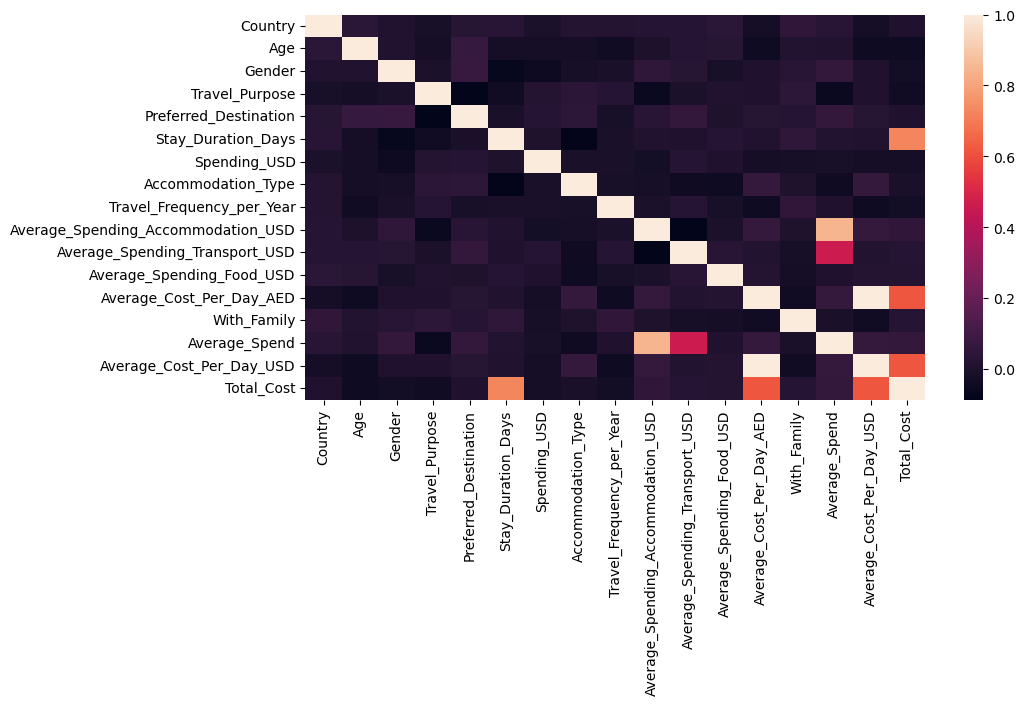

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [83]:
df.columns

Index(['Country', 'Age', 'Gender', 'Travel_Purpose', 'Preferred_Destination',
       'Stay_Duration_Days', 'Spending_USD', 'Accommodation_Type',
       'Travel_Frequency_per_Year', 'Average_Spending_Accommodation_USD',
       'Average_Spending_Transport_USD', 'Average_Spending_Food_USD',
       'Average_Cost_Per_Day_AED', 'With_Family', 'Average_Spend',
       'Average_Cost_Per_Day_USD', 'Total_Cost'],
      dtype='object')

In [78]:
df.to_csv('tourism_cleaned.csv')

In [79]:
import pickle
with open('tourism-expense.pickle','wb') as f:
    pickle.dump(model,f)

In [80]:
import json
cols=[col.lower() for col in df.columns]
with open("tourism.json",'w') as f:
    f.write(json.dumps(cols))

In [81]:
df['Country'].unique()

array([3, 1, 6, 7, 4, 0, 2, 5], dtype=int64)